# Example Plots
This notebook is a series of example plots. It contains examples of simple plots, fits and interactive plots. 

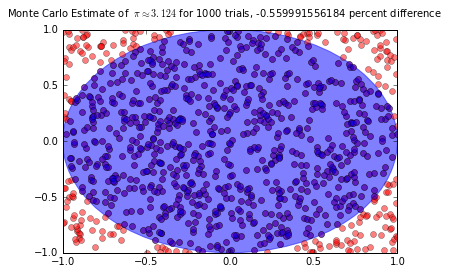

In [2]:
# interactive plot of finding pi using a monte-carlo approach
import matplotlib.pyplot as plt
import random
import math
def montecarlo_pi(number_experiments):
    """Finds pi using a montecarlo approach, by performing n random placements of points on a square and finding the
    number of points in a circle compared to the number of points in a square on the interval [0,1]"""
    x_positions=[random.uniform(-1,1) for i in range(number_experiments)]
    y_positions=[random.uniform(-1,1) for i in range(number_experiments)]
    
    # area of circle of radius  is pi, area of square=4, so pi=4*number_in_circle/number_in_square
    number_in_circle=0
    inside_x=[]
    inside_y=[]
    for index,value in enumerate(x_positions):
        if (value**2+y_positions[index]**2)<1.**2:
            number_in_circle+=1
            inside_x.append(value)
            inside_y.append(y_positions[index])
    #print number_in_circle
    pi_estimate=4.0*float(number_in_circle)/(float(number_experiments))
    plt.plot(x_positions,y_positions,'ro',alpha=0.5)
    plt.plot(inside_x,inside_y,'bo',alpha=0.5)
    plt.suptitle(r'Monte Carlo Estimate of  $\pi\approx%s $ for %s trials, %s percent difference'%(pi_estimate,
                                                                                            number_experiments,
                                                                                           100*(pi_estimate-math.pi)/math.pi))
    circle=plt.Circle((0,0), radius=1, color='b',  alpha=0.5)
    
    ax = plt.gca()
    ax.add_artist(circle)
    #ax.set_aspect('equal', 'datalim'
    plt.show()
montecarlo_pi(1000)

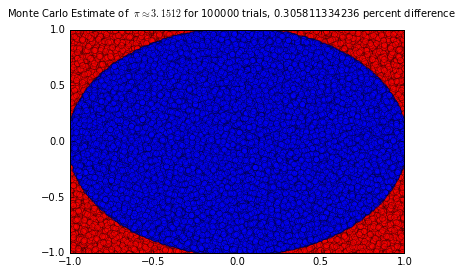

In [3]:
%matplotlib inline
from ipywidgets import *

interact(montecarlo_pi,number_experiments=(10,100000,10))

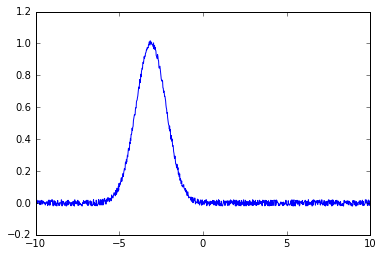

In [4]:
%matplotlib inline
from ipywidgets import *
import random
import numpy
import scipy
import scipy.optimize
import scipy.stats

def lorentzian_function(a,x):
    "a[0]=amplitude,a[1]=center,a[2]=FWHM"
    return a[0]*1/(1+(x-a[1])**2/(a[2]**2))

def gaussian_function(a,x):
    " a[0]=amplitude, a[1]=center, a[2]=std deviation"
    return a[0]*scipy.exp(-(x-a[1])**2/(2.0*a[2]**2))
def power_function(a,x):
    " a[0]=constant, a[1]=center, a[2]=std deviation"
    return a[0]+a[1]*x+a[2]*x**2

# Define the fit function that returns least square optimization
def fit(function,xdata,ydata,a0):
    fit_dictionary={}
    error_function=lambda a, xdata, ydata:function(a,xdata)-ydata
    a,succes=scipy.optimize.leastsq(error_function, a0,args=(xdata,ydata))
    return a


def plot_gaussian_with_noise(amplitude,mu,sigma,noise_distribution,noise_width,noise_center):
    xdata=numpy.linspace(-10,10,1000)
    a=[amplitude,mu,sigma]
    if noise_distribution in ['uniform']:
        left=noise_center-noise_width/2
        right=noise_center+noise_width/2
        [noise_width,noise_center]=[left,right]
        
    ydata=[gaussian_function(a,x)+random.__dict__[noise_distribution](noise_center,noise_width) for x in xdata]
    plt.plot(xdata,ydata)
    plt.show()
interact(plot_gaussian_with_noise,
         amplitude=(0.,1.,.1),mu=(-10,10,.1),sigma=(.1,10,.1),
         noise_distribution=('gauss','uniform','lognormvariate'),
         noise_width=(0,1,.01),noise_center=fixed(0))

In [5]:
def calculate_residuals(fit_function,a,xdata,ydata):
    """Given the fit function, a parameter vector, xdata, and ydata returns the residuals as [x,y] pairs"""
    output_x=xdata
    output_y=[fit_function(a,x)-ydata[index] for index,x in enumerate(xdata)]
    return [output_x,output_y]

def fit_and_plot(fit_function,xdata,ydata,a0=[1,1,1]):
    """fit and plot, fits xdata, ydata  with fit function and returns a plot of the fit overlaid with the data and 
    a plot of the residuals, including a histogram"""
    fit_results=fit(fit_function,xdata,ydata,a0)
    # To do 2 plots in 2 rows with shared axis
    fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True)
    ax0.plot(xdata,ydata,'bo',label='data')
    ax0.plot(xdata,[fit_function(fit_results,x) for x in xdata],'r-',linewidth=3,label='fit')
    ax0.legend(loc='upper right', shadow=True)
    ax0.set_title('Fit of data using {0}'.format(fit_function.__name__))
    [x,y]=calculate_residuals(fit_function,fit_results,xdata,ydata)
    ax1.plot(x,y)
    ax1.set_title('Residuals')
    options={'fontsize':12}
    ax0.text(11,
             -.1,
             "a[0] = {0:3.2g}\na[1]= {1:3.2g}\na[2]= {2:3.2g}".format(fit_results[0],fit_results[1],fit_results[2]),
             **options)
    plt.show()


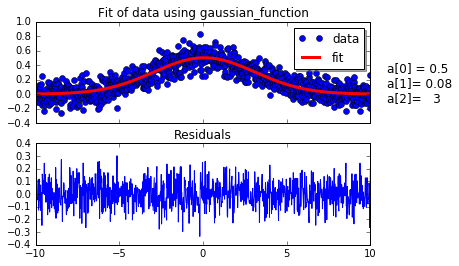

In [6]:
xdata=numpy.linspace(-10,10,1000)
ydata=[.5*scipy.exp(-(x-.1)**2/(2.0*3.0**2))+random.gauss(0,.1) for x in xdata]
fit_and_plot(gaussian_function,xdata,ydata)

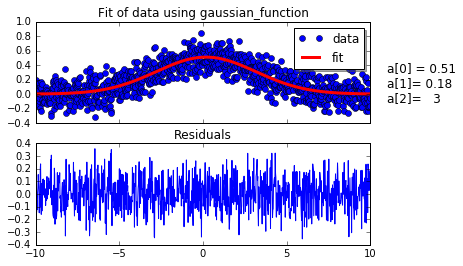

In [7]:

interact(lambda noise_sigma,noise_mu:fit_and_plot(gaussian_function,
                               xdata,
                               [.5*scipy.exp(-(x-.1)**2/(2.0*3.0**2))+random.gauss(noise_mu,noise_sigma) for x in xdata]),
         noise_sigma=(0,1,.01),
         noise_mu=(0,1,.01))

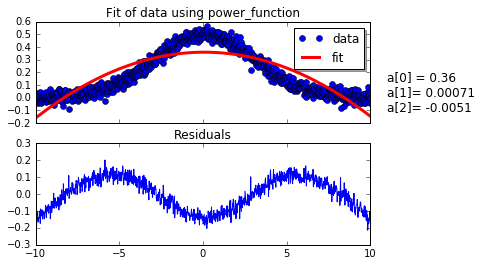

In [8]:
interact(lambda fit_function,noise_sigma,noise_mu:fit_and_plot(globals()[fit_function],
                               xdata,
                               [.5*scipy.exp(-(x-.1)**2/(2.0*3.0**2))+random.gauss(noise_mu,noise_sigma) for x in xdata]),
         fit_function=('gaussian_function','lorentzian_function','power_function'),
         noise_sigma=(0,1,.01),
         noise_mu=(0,1,.01))